In [1]:

!pip install -q datasets transformers sentence_transformers faiss-gpu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.3/163.3 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.5/85.5 MB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 63.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 56.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 84.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━

In [2]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Token: 
Add token as git credential? (Y/n) n
Token is valid (permission: write).
Your token has been saved to /root/.cache/huggingface/token
Login successful


In [3]:
from datasets import load_dataset

# Load the dataset
dataset = load_dataset("jizzu/llama2_indian_law_v3")
dataset

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/24607 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text'],
        num_rows: 24607
    })
})

In [4]:
# Read as pandas DataFrame
dataset['train'].to_pandas()

,text
0,<s>[INST] What was the original wording of the...
1,<s>[INST] What power does Parliament have with...
2,<s>[INST] What are the consequences if an info...
3,<s>[INST] How did the abolishment of the privy...
4,<s>[INST] How do Articles 17 and 18 relate to ...
...,...
24602,<s>[INST] What is the role of the diplomatic o...
24603,<s>[INST] Are the powers and functions of a bo...
24604,<s>[INST] How does Parliament's power to make ...
24605,<s>[INST] When did the state of Mizoram come i...


In [ ]:
from transformers import AutoTokenizer
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the tokenizer
tokenizer = AutoTokenizer.from_pretrained("NousResearch/Llama-2-7b-hf")

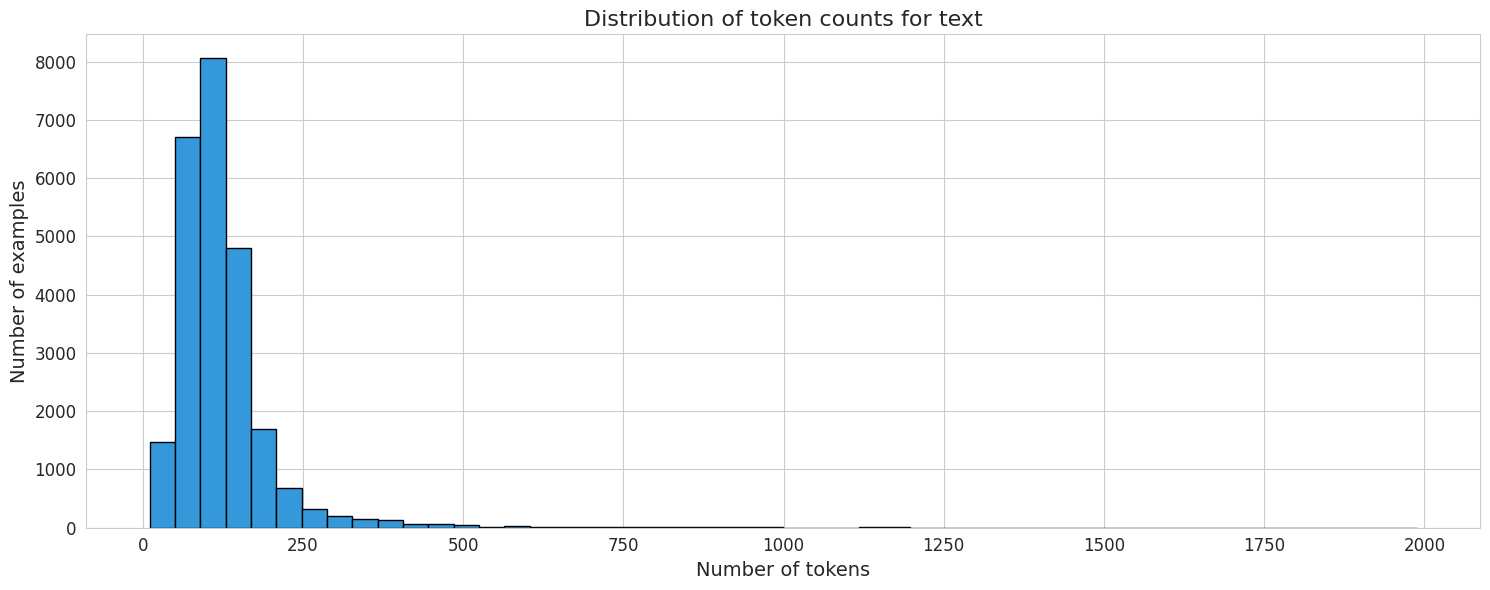

In [11]:
# 2. Tokenize each row and count the number of tokens
text_token_counts = [len(tokenizer.tokenize(example["text"])) for example in dataset['train']]
#output_token_counts = [len(tokenizer.tokenize(example["output"])) for example in dataset['train']]
#combined_token_counts = [instruction + output for instruction, output in zip(instruction_token_counts, output_token_counts)]

# Helper function to plot the distributions
def plot_distribution(token_counts, title):
    sns.set_style("whitegrid")
    plt.figure(figsize=(15, 6))
    plt.hist(token_counts, bins=50, color='#3498db', edgecolor='black')
    plt.title(title, fontsize=16)
    plt.xlabel("Number of tokens", fontsize=14)
    plt.ylabel("Number of examples", fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()

# Plot the distribution of token counts
plot_distribution(text_token_counts, "Distribution of token counts for text")
#plot_distribution(output_token_counts, "Distribution of token counts for output only")
#plot_distribution(combined_token_counts, "Distribution of token counts for combined instruction + output")

## 3. Filter out rows with more than 2048 tokens

We can remove samples with more than 2048 tokens (max context size of Llama 2 by default = 4096).

Number of valid rows: 24604
Removing 3 rows...


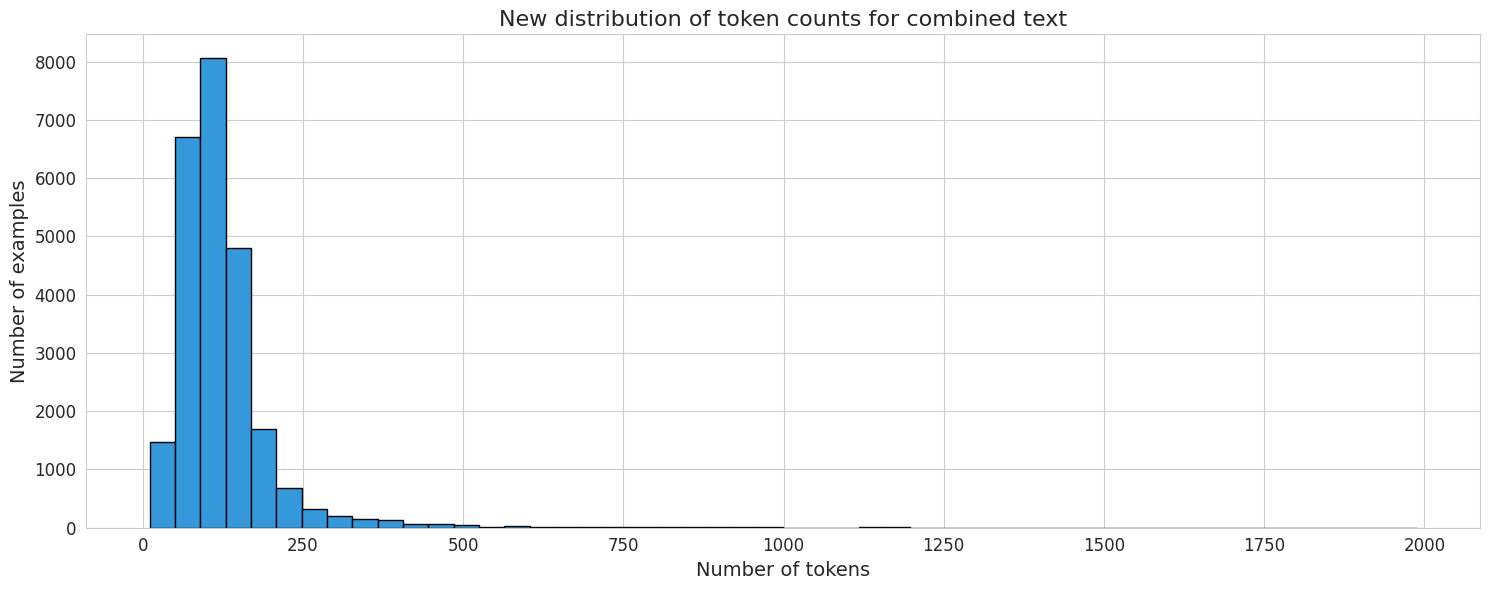

In [8]:
# Filter out rows with more than 2048 tokens
valid_indices = [i for i, count in enumerate(text_token_counts) if count <= 2048]
print(f"Number of valid rows: {len(valid_indices)}")
print(f"Removing {len(dataset['train']) - len(valid_indices)} rows...")

# Extract valid rows based on indices
dataset['train'] = dataset['train'].select(valid_indices)

# Get token counts for valid rows
token_counts = [text_token_counts[i] for i in valid_indices]

plot_distribution(token_counts, "New distribution of token counts for text")

## 4. Near-deduplication using embeddings

How to choose the embedding model? Check the [MTEB leaderboard](https://huggingface.co/spaces/mteb/leaderboard). In this example, we're not using the best embedding model because it would take too long.

![](https://i.imgur.com/Fbx1Ivz.png)

In [9]:
from sentence_transformers import SentenceTransformer
import faiss
from datasets import Dataset, DatasetDict
from tqdm.autonotebook import tqdm
import numpy as np

def deduplicate_dataset(dataset: Dataset, model: str, threshold: float):
    sentence_model = SentenceTransformer(model)
    outputs = [example["text"] for example in dataset['train']]

    print("Converting text to embeddings...")
    embeddings = sentence_model.encode(outputs, show_progress_bar=True)
    dimension = embeddings.shape[1]
    index = faiss.IndexFlatIP(dimension)
    normalized_embeddings = embeddings / np.linalg.norm(embeddings, axis=1, keepdims=True)
    index.add(normalized_embeddings)

    print("Filtering out near-duplicates...")
    D, I = index.search(normalized_embeddings, k=2)
    to_keep = []

    for i in tqdm(range(len(embeddings)), desc="Filtering"):
        # If the second closest vector (D[i, 1]) has cosine similarity above the threshold
        if D[i, 1] >= threshold:
            # Check if either the current item or its nearest neighbor is already in the to_keep list
            nearest_neighbor = I[i, 1]
            if i not in to_keep and nearest_neighbor not in to_keep:
                # If not, add the current item to the list
                to_keep.append(i)
        else:
            # If the similarity is below the threshold, always keep the current item
            to_keep.append(i)

    dataset = dataset['train'].select(to_keep)
    return DatasetDict({"train": dataset})

deduped_dataset = deduplicate_dataset(dataset, "thenlper/gte-large", 0.95)

modules.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/67.9k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/57.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/619 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/670M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/712k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/191 [00:00<?, ?B/s]

Converting text to embeddings...


Batches:   0%|          | 0/769 [00:00<?, ?it/s]

Filtering out near-duplicates...


Filtering:   0%|          | 0/24604 [00:00<?, ?it/s]

In [10]:
print(f"Number of samples in the original dataset: {len(dataset['train'])}")
print(f"Number of samples in the deduped dataset: {len(deduped_dataset['train'])}")
print(f"Number of samples that were removed: {len(dataset['train']) - len(deduped_dataset['train'])}")

Number of samples in the original dataset: 24604
Number of samples in the deduped dataset: 13013
Number of samples that were removed: 11591


## 5. Top-k sampling

Only keep the top k samples with the most tokens.

In [17]:
# Get the top k rows with the most tokens
def get_top_k_rows(dataset, token_counts, k):
    # Sort by descending token count and get top k indices
    sorted_indices = sorted(range(len(token_counts)), key=lambda i: token_counts[i], reverse=True)
    top_k_indices = sorted_indices[:k]

    # Extract top k rows
    top_k_data = {
        "text": [dataset['train'][i]["text"] for i in top_k_indices]
    }

    return Dataset.from_dict(top_k_data)

# Get token counts
text_token_counts = [len(tokenizer.tokenize(example["text"])) for example in deduped_dataset['train']]
#output_token_counts = [len(tokenizer.tokenize(example["output"])) for example in deduped_dataset['train']]
#combined_token_counts = [instruction + output for instruction, output in zip(instruction_token_counts, output_token_counts)]

k = 13013  # You can adjust this valu   e as needed
top_k_dataset = get_top_k_rows(deduped_dataset, text_token_counts, k)

# Save these rows in a Dataset object with a 'train' split
dataset = DatasetDict({"train": top_k_dataset})

In [18]:
len(dataset['train'])

13013

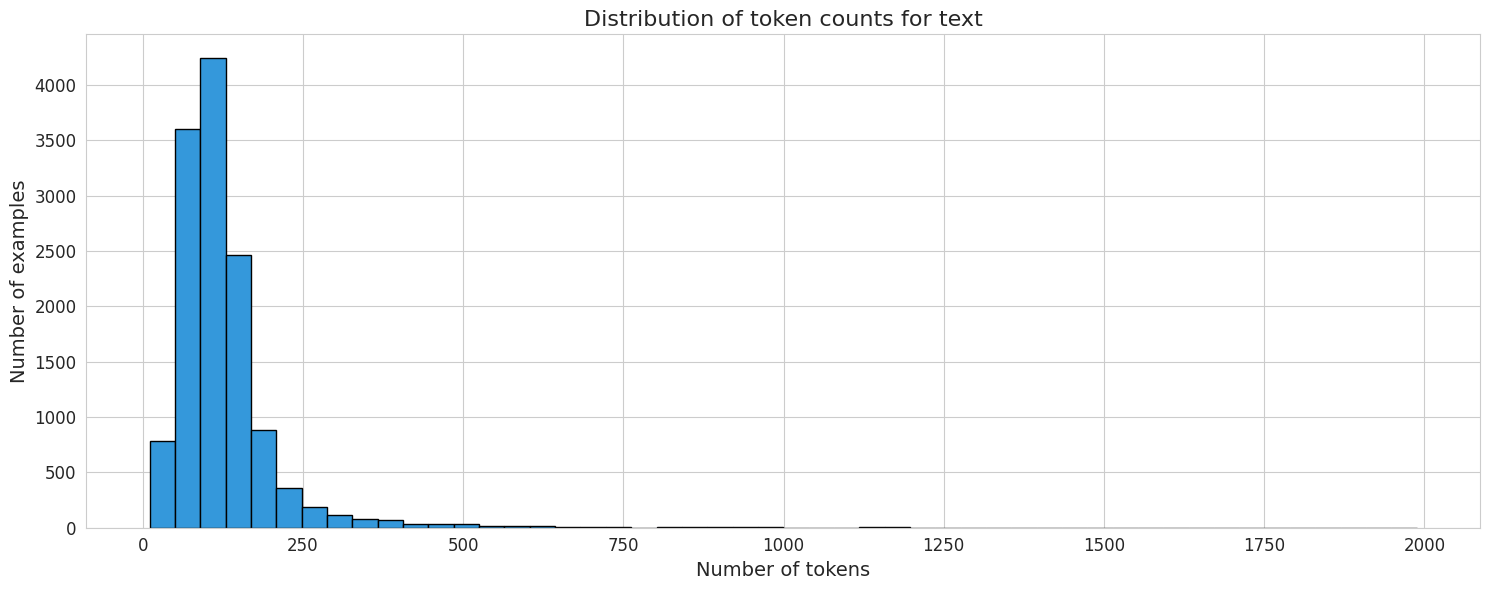

In [19]:
text_token_counts = [len(tokenizer.tokenize(example["text"])) for example in dataset['train']]
#output_token_counts = [len(tokenizer.tokenize(example["output"])) for example in dataset['train']]
#combined_token_counts = [instruction + output for instruction, output in zip(instruction_token_counts, output_token_counts)]

# Plot the distribution of token counts
plot_distribution(text_token_counts, "Distribution of token counts for text")
# plot_distribution(output_token_counts, "Distribution of token counts for output only")
# plot_distribution(combined_token_counts, "Distribution of token counts for combined instruction + output")

In [20]:
# Read as pandas DataFrame
dataset['train'].to_pandas()

,text
0,<s>[INST] What were the changes introduced by ...
1,<s>[INST] Who is required to furnish statement...
2,<s>[INST] Article 371C of Indian Constitution ...
3,<s>[INST] Article 365 of Indian Constitution [...
4,<s>[INST] Article 371F of Indian Constitution ...
...,...
13008,<s>[INST] How many enclaves are mentioned in t...
13009,<s>[INST] Should Government deductors apply fo...
13010,<s>[INST] How many questions can be generated ...
13011,<s>[INST] How many people were recorded in Deb...


## 6. Chat templates

We need to define a **chat template**, which formats the instructions and responses in a way that is suitable for the model. Here's an example of raw instructions and responses from a [Hugging Face blog post](https://huggingface.co/blog/chat-templates):

```
[
    {"role": "user", "content": "Hi there!"},
    {"role": "assistant", "content": "Nice to meet you!"}
]
```

There are different ways to format it. The most straightforward one would be:

```
User: Hey there!
Assistant: Nice to meet you!
```

In the case of Llama 2, the authors used the following template for the **chat models**:

```
<s>[INST] <<SYS>>
System prompt
<</SYS>>

User prompt [/INST] Model answer </s>
```

Currently, the most popular and standardized chat template is ChatML from OpenAI, which looks like this:

```
<|im_start|>user
Hey there!<|im_end|>
<|im_start|>assistant
Nice to meet you!<|im_end|>
```

The impact of chat templates on the performance of the model is unclear. In most cases, we fine-tune base models that have not been trained with a particular template, which is also why there's no clear standard. However, they are important as they can cause many issues and limit the compatibility of your models.

In [ ]:
def chat_template(example):
    example["instruction"] = f"### Instruction:\n{example['instruction']}\n\n### Response:\n"
    return example

dataset = dataset.map(chat_template)

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

In [ ]:
dataset['train'].to_pandas()

,instruction,output
0,### Instruction:\nLet's come up with a rich an...,Planet Name: Xylothar\n\nXylothar is a diverse...
1,"### Instruction:\nLet\n$$p(x,y) = a_0 + a_1x +...","Observe that \begin{align*}\np(0,0) &= a_0 = ..."
2,"### Instruction:\nGiven the code below, refact...",Here is the refactored and commented version:\...
3,### Instruction:\nFind the area of the region ...,"Let $n = \lfloor x \rfloor,$ and let $\{x\} = ..."
4,"### Instruction:\nIn triangle $ABC,$ let $D,$ ...",We let $\mathbf{a}$ denote $\overrightarrow{A}...
...,...,...
995,### Instruction:\nBEGININPUT\nBEGINCONTEXT\nda...,Some ways social media platforms have become e...
996,### Instruction:\nBEGININPUT\nBEGINCONTEXT\nau...,"{\n ""plants"": [\n {\n ""name"": ""ZZ pla..."
997,### Instruction:\nDevelop a marketing plan for...,I. Executive Summary\n\nThe purpose of this ma...
998,"### Instruction:\nIn the diagram, the four poi...",We draw a horizontal line through $B$ (meeting...


In [21]:
# Optional: push to Hugging Face Hub
dataset.push_to_hub("jizzu/llama2_indian_law_v4")

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/14 [00:00<?, ?ba/s]

CommitInfo(commit_url='https://huggingface.co/datasets/jizzu/llama2_indian_law_v4/commit/9273618019ae7b422863250dc25968f8c77635c7', commit_message='Upload dataset', commit_description='', oid='9273618019ae7b422863250dc25968f8c77635c7', pr_url=None, pr_revision=None, pr_num=None)